Summary: Difference class $(0,1)$ occurs for $x2 > 97.5 \land -203.5 < x1 ≤ -7.0$ and $x2 ≤ -107.5 \land -15.5 < x1 ≤ -7.5$; difference class $(1,0)$ occurs for $-7.5 < x1 ≤ 149.5 \land -107.5 < x2 ≤ 97.5$

In [12]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from comparers import ModelComparer, plot_decision_boundary
from diro2c_wrapper import generate_diro2c_explanation, plot_diro2c_2d, plot_diro2c_tree, \
                           print_diro2c_rules
from baseline import get_rules
from tasks.running_example import make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

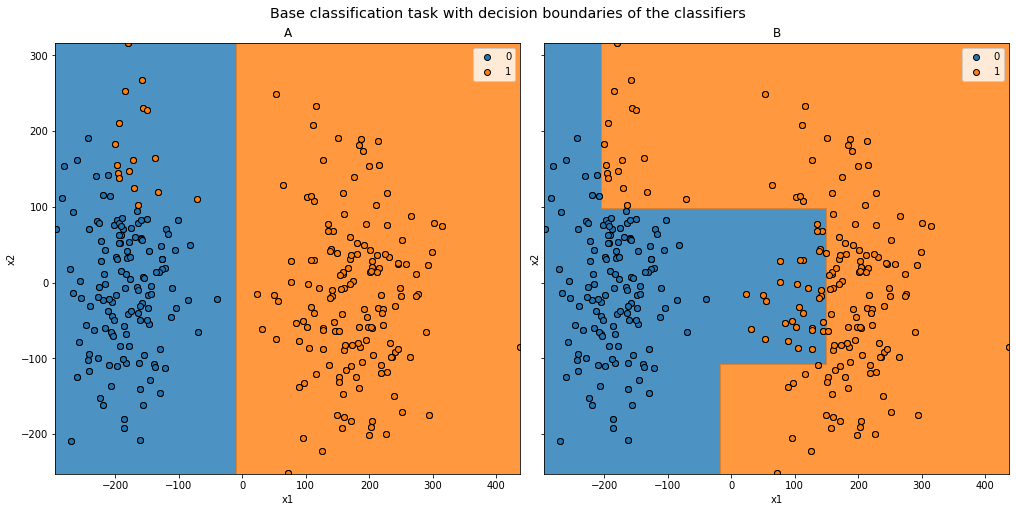

In [4]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label')

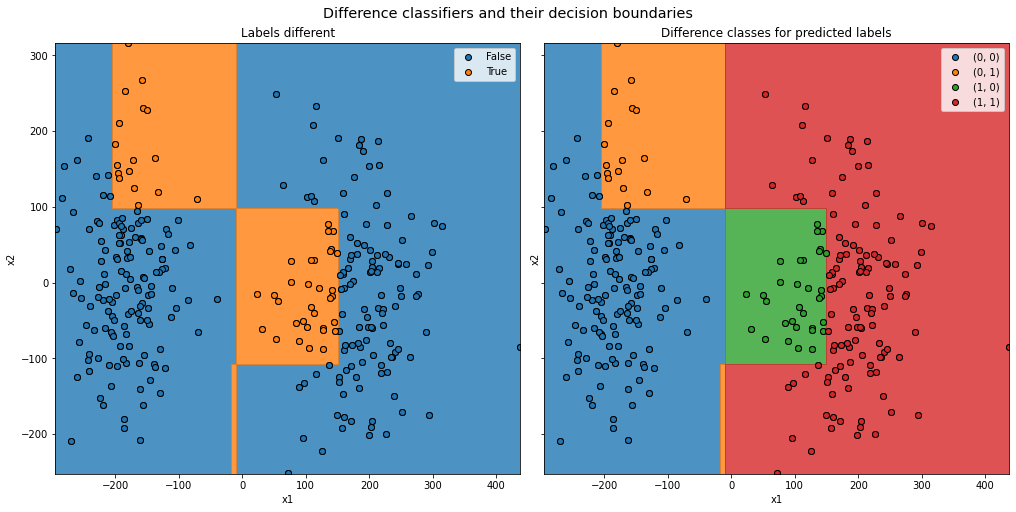

In [5]:
comparer.plot_decision_boundaries(X)

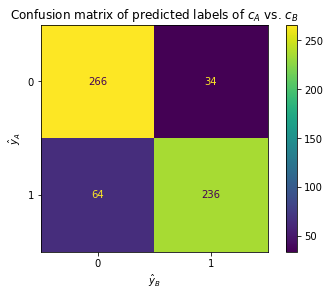

In [6]:
comparer.plot_confusion_matrix(X)

In [7]:
%%time
_ = generate_diro2c_explanation(X, 0, comparer, focus_class='(0, 1)', gn_population_size=1000)

CPU times: user 3.4 s, sys: 52.9 ms, total: 3.45 s
Wall time: 3.81 s


# Global explanations

## $(0,1)$

In [8]:
focus_class = '(0, 1)'

In [9]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global', focus_class=focus_class, gn_population_size=1000)

CPU times: user 2min 55s, sys: 1.38 s, total: 2min 56s
Wall time: 3min 2s


In [10]:
tree = explanation['binary_diff_classifer']['dc_full']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [13]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

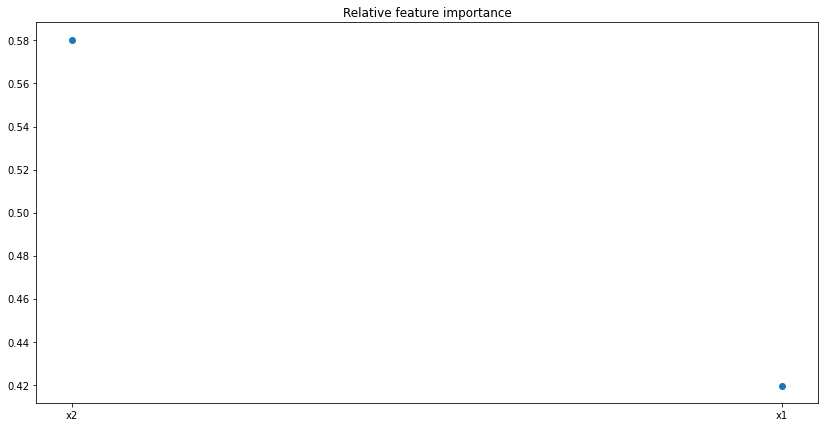

In [14]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

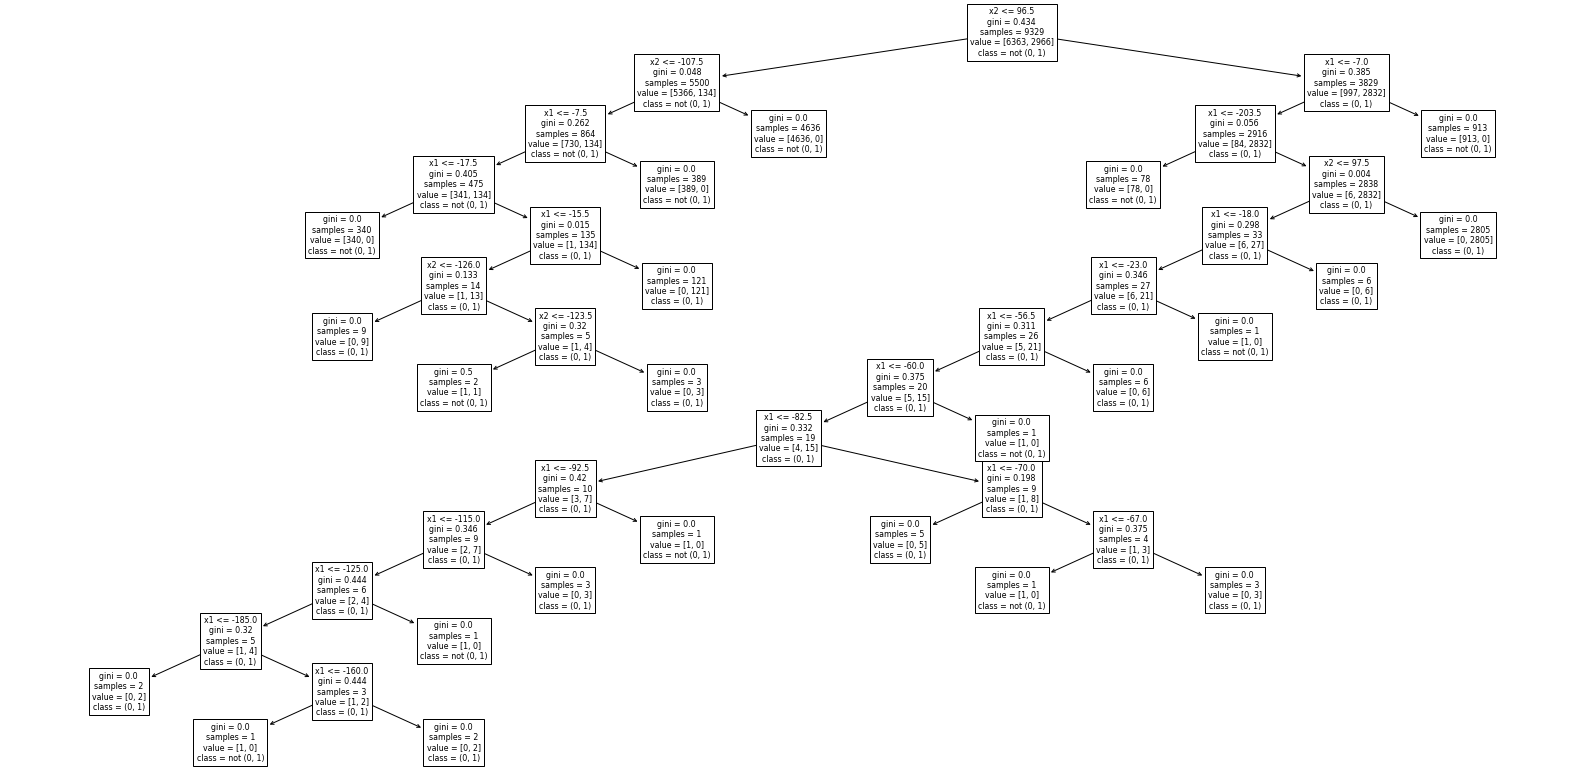

In [15]:
fig, ax = plt.subplots(figsize=(28, 14))
plot_diro2c_tree(explanation)

In [20]:
rules = get_rules(tree, feature_names, class_names, focus_class, feature_order)
[print(rule) for rule in rules];

if (x2 > 97.5) and (x1 > -203.5) and (x1 <= -7.0) then class: (0, 1) (proba: 100.0%) | based on 2,805 samples
if (x2 <= -107.5) and (x1 > -15.5) and (x1 <= -7.5) then class: (0, 1) (proba: 100.0%) | based on 121 samples
if (x2 <= -126.0) and (x1 > -17.5) and (x1 <= -15.5) then class: (0, 1) (proba: 100.0%) | based on 9 samples
if (x2 > 96.5) and (x2 <= 97.5) and (x1 > -18.0) and (x1 <= -7.0) then class: (0, 1) (proba: 100.0%) | based on 6 samples
if (x2 > 96.5) and (x2 <= 97.5) and (x1 > -56.5) and (x1 <= -23.0) then class: (0, 1) (proba: 100.0%) | based on 6 samples
if (x2 > 96.5) and (x2 <= 97.5) and (x1 > -82.5) and (x1 <= -70.0) then class: (0, 1) (proba: 100.0%) | based on 5 samples
if (x2 > 96.5) and (x2 <= 97.5) and (x1 > -115.0) and (x1 <= -92.5) then class: (0, 1) (proba: 100.0%) | based on 3 samples
if (x2 > -123.5) and (x2 <= -107.5) and (x1 > -17.5) and (x1 <= -15.5) then class: (0, 1) (proba: 100.0%) | based on 3 samples
if (x2 > 96.5) and (x2 <= 97.5) and (x1 > -67.0) and

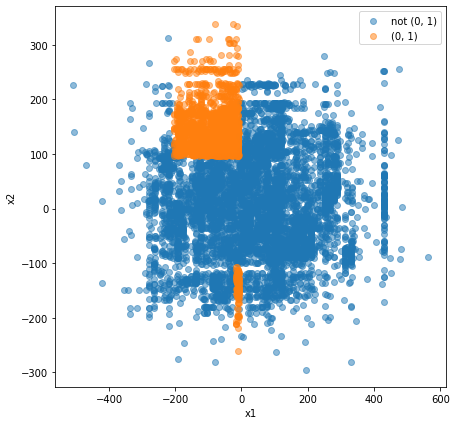

In [17]:
plot_diro2c_2d(explanation, 'x1', 'x2')

## $(1,0)$

In [21]:
focus_class = '(1, 0)'

In [22]:
%%time
explanation = generate_diro2c_explanation(X, 0, comparer, generation_func='global', focus_class=focus_class, gn_population_size=1000)

CPU times: user 3min 8s, sys: 2.02 s, total: 3min 10s
Wall time: 3min 29s


In [23]:
tree = explanation['binary_diff_classifer']['dc_full']
feature_names = comparer.feature_names
class_names = explanation['class_names']

In [24]:
feature_importances = tree.feature_importances_
feature_order = np.flip(np.argsort(feature_importances))

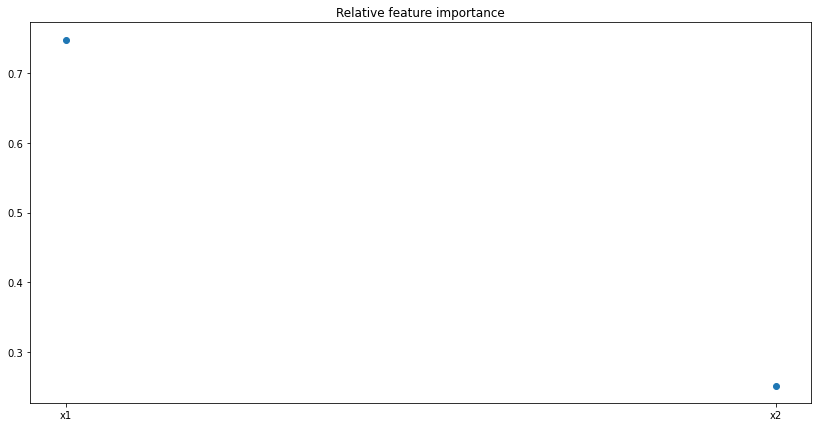

In [25]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_title('Relative feature importance')
ax.scatter(comparer.feature_names[feature_order], feature_importances[feature_order])
plt.show()

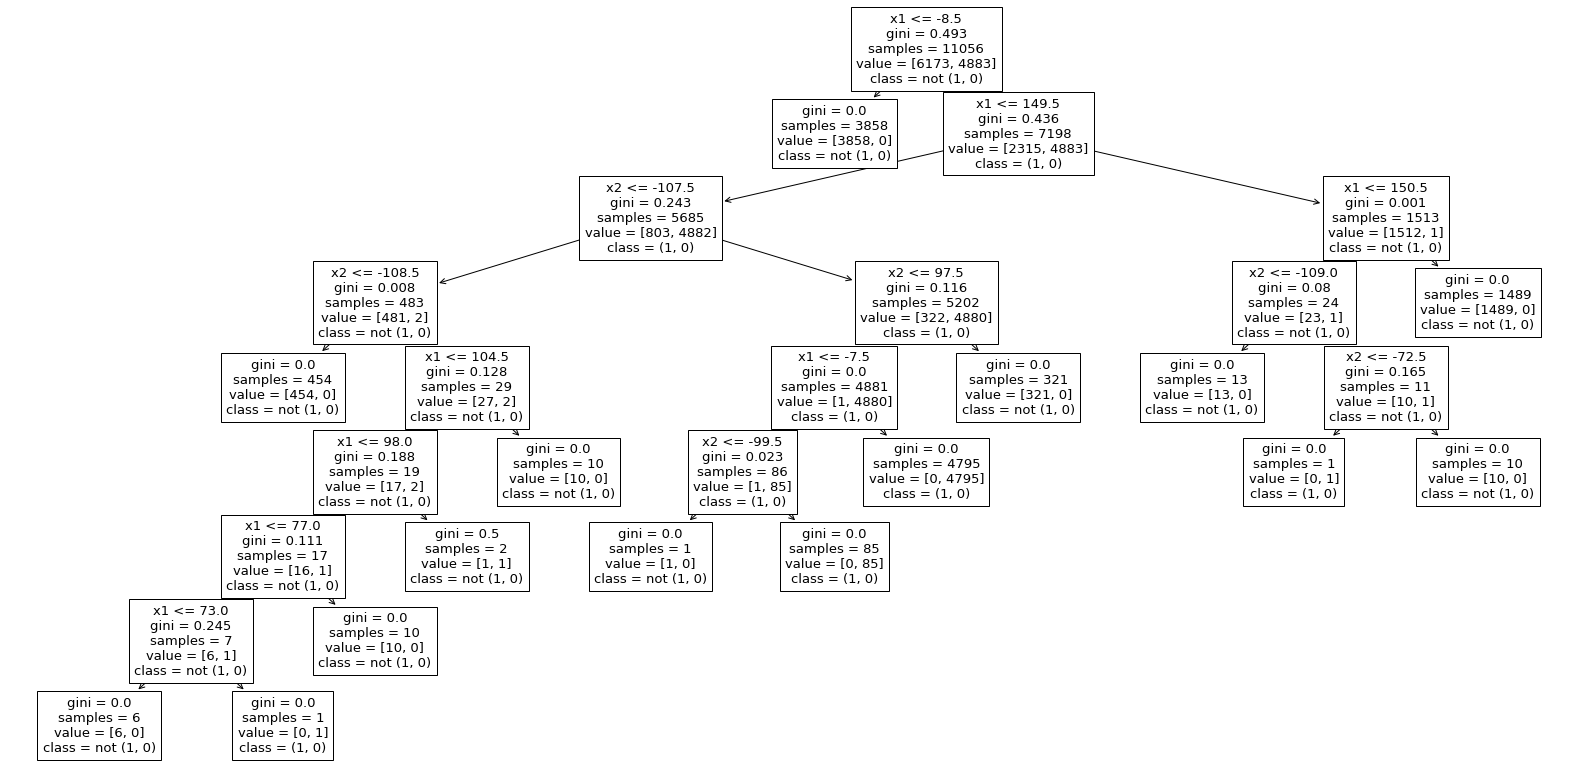

In [26]:
fig, ax = plt.subplots(figsize=(28, 14))
plot_diro2c_tree(explanation)

In [27]:
rules = get_rules(tree, feature_names, class_names, focus_class, feature_order)
[print(rule) for rule in rules];

if (x1 > -7.5) and (x1 <= 149.5) and (x2 > -107.5) and (x2 <= 97.5) then class: (1, 0) (proba: 100.0%) | based on 4,795 samples
if (x1 > -8.5) and (x1 <= -7.5) and (x2 > -99.5) and (x2 <= 97.5) then class: (1, 0) (proba: 100.0%) | based on 85 samples
if (x1 > 149.5) and (x1 <= 150.5) and (x2 > -109.0) and (x2 <= -72.5) then class: (1, 0) (proba: 100.0%) | based on 1 samples
if (x1 > 73.0) and (x1 <= 77.0) and (x2 > -108.5) and (x2 <= -107.5) then class: (1, 0) (proba: 100.0%) | based on 1 samples


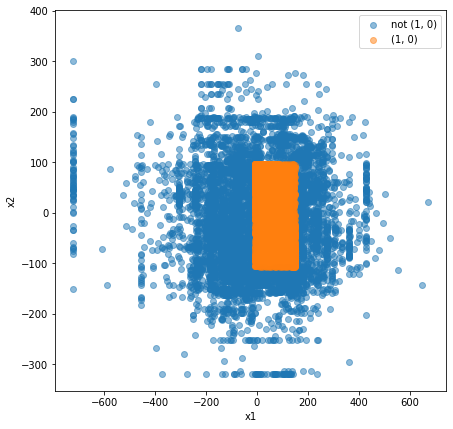

In [28]:
plot_diro2c_2d(explanation, 'x1', 'x2')